# **STAR CLASSIFICATION**


---

*   Assignment 3, Applied AI
*   Mehnraz Miri, 201729365


# **1. Loading the data**


---



## **1.1. Importing relevant Libraries**

In [89]:
# Installing the Keras Tuner library using pip
!pip install keras-tuner

In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad
from kerastuner import HyperModel
from kerastuner.tuners import Hyperband
from kerastuner import HyperParameters
import keras_tuner as kt
import time

## **1.2. Importing the dataset**

In [91]:
# Importing the necessary module to mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')
# Changing the current directory to the specified path on Google Drive
%cd "/content/drive/My Drive/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive


## **1.3. Reading the dataset**

In [92]:
df = pd.read_csv("stars_data.csv")
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


# **2. Understanding the dataset**


---



## **2.1. Checking data information and datatypes**

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [94]:
df.nunique()

Temperature (K)           228
Luminosity(L/Lo)          208
Radius(R/Ro)              216
Absolute magnitude(Mv)    228
Star type                   6
Star color                 19
Spectral Class              7
dtype: int64

In [95]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


We can see that Star Color and Spectral class are categorical datatypes. Temperature, Luminosity, Radius, and Absolute magnitude are continous numerical features while star type is a discrete numeric feature.

## **2.2. Checking if there are any duplicated or null data**

In [96]:
df.duplicated().sum()

0

In [97]:
df.isnull().sum().sum()

0

There are no duplicates or nulls, so we proceed.

## **2.3. Plotting histograms for numerical data**

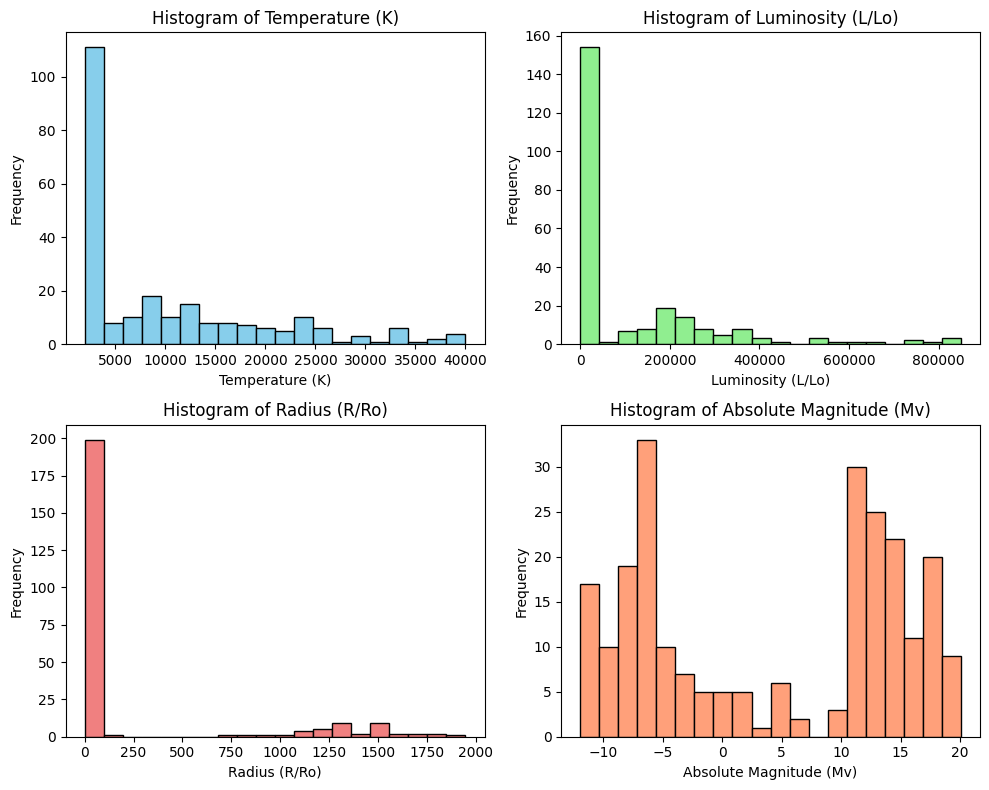

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Temperature histogram
axs[0, 0].hist(df["Temperature (K)"], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram of Temperature (K)')
axs[0, 0].set_xlabel('Temperature (K)')
axs[0, 0].set_ylabel('Frequency')

# Luminosity histogram
axs[0, 1].hist(df["Luminosity(L/Lo)"], bins=20, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Histogram of Luminosity (L/Lo)')
axs[0, 1].set_xlabel('Luminosity (L/Lo)')
axs[0, 1].set_ylabel('Frequency')

# Radius histogram
axs[1, 0].hist(df["Radius(R/Ro)"], bins=20, color='lightcoral', edgecolor='black')
axs[1, 0].set_title('Histogram of Radius (R/Ro)')
axs[1, 0].set_xlabel('Radius (R/Ro)')
axs[1, 0].set_ylabel('Frequency')

# Absolute magnitude histogram
axs[1, 1].hist(df["Absolute magnitude(Mv)"], bins=20, color='lightsalmon', edgecolor='black')
axs[1, 1].set_title('Histogram of Absolute Magnitude (Mv)')
axs[1, 1].set_xlabel('Absolute Magnitude (Mv)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## **2.4. Plotting the star types**


*   The star types labels were added based on https://www.kaggle.com/datasets/deepu1109/star-dataset/data for better understanding of the data



<ipython-input-99-e6b5f22a7be8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Star type', palette=sns.color_palette("viridis", 6))


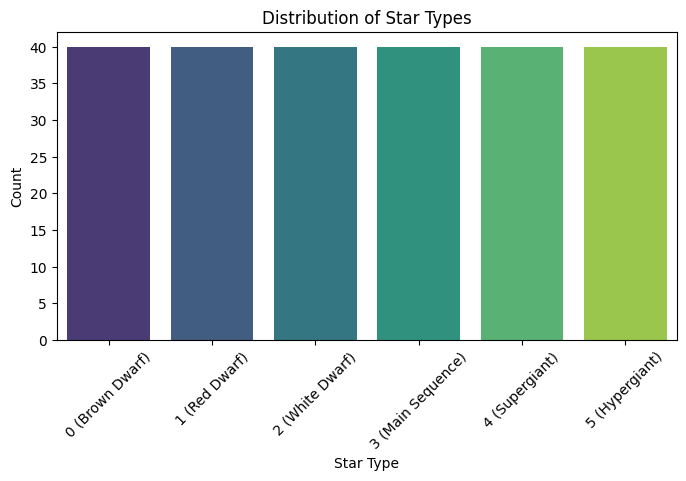

In [99]:
star_type_labels = [
    "0 (Brown Dwarf)",
    "1 (Red Dwarf)",
    "2 (White Dwarf)",
    "3 (Main Sequence)",
    "4 (Supergiant)",
    "5 (Hypergiant)"
]

# Plotting Star Type with labels
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Star type', palette=sns.color_palette("viridis", 6))
plt.title('Distribution of Star Types')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.xticks(ticks=range(len(star_type_labels)), labels=star_type_labels, rotation=45)
plt.show()

We can see that the distribution of startypes is balanced.

## **2.5. Checking the categorical data**

### **2.5.1. Spectral Class**

In [100]:
df['Spectral Class'].value_counts()

Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64

Based on the provided information, we can conclude that the data is unbalanced in terms of the distribution of spectral classes.

### **2.5.2. Star Color**

In [101]:
df['Star color'].value_counts()

Star color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64

we can see that there are improperly formatted entries such as 'Blue-White' and 'Blue white', which are technically the same thing, so we need to fix this before training our models to prevent inaccuracies.

In [102]:
df['Star color'] = df['Star color'].str.lower().str.strip().str.replace('-', ' ')
df['Star color'].value_counts()

Star color
red                   112
blue                   56
blue white             41
white                  10
yellow white            8
yellowish white         3
yellowish               3
whitish                 2
orange                  2
pale yellow orange      1
white yellow            1
orange red              1
Name: count, dtype: int64

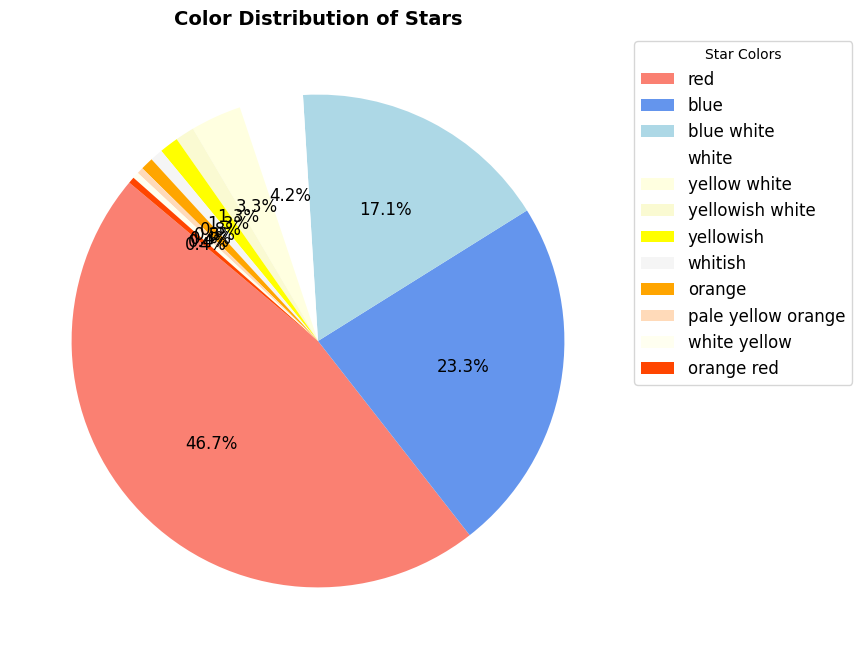

In [103]:
# Get the value counts for star colors
color_counts = df['Star color'].value_counts()

# Define a color map to match the star colors
color_map = {
    'red': 'salmon',
    'blue': 'cornflowerblue',
    'blue white': 'lightblue',
    'white': 'white',
    'yellow white': 'lightyellow',
    'yellowish white': 'lightgoldenrodyellow',
    'yellowish': 'yellow',
    'whitish': 'whitesmoke',
    'orange': 'orange',
    'pale yellow orange': 'peachpuff',
    'white yellow': 'ivory',
    'orange red': 'orangered'
}

# Create a list of colors for the pie chart
colors = [color_map[color] for color in color_counts.index]

# Plot the pie chart
plt.figure(figsize=(12, 8))
plt.pie(color_counts, labels=None, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})

# Add a legend
plt.legend(color_counts.index, title="Star Colors", bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)
plt.title('Color Distribution of Stars', fontsize=14, weight='bold')
plt.show()

## **2.6. Scatter plots for understanding the relationship between each feature and the Spectral Class**

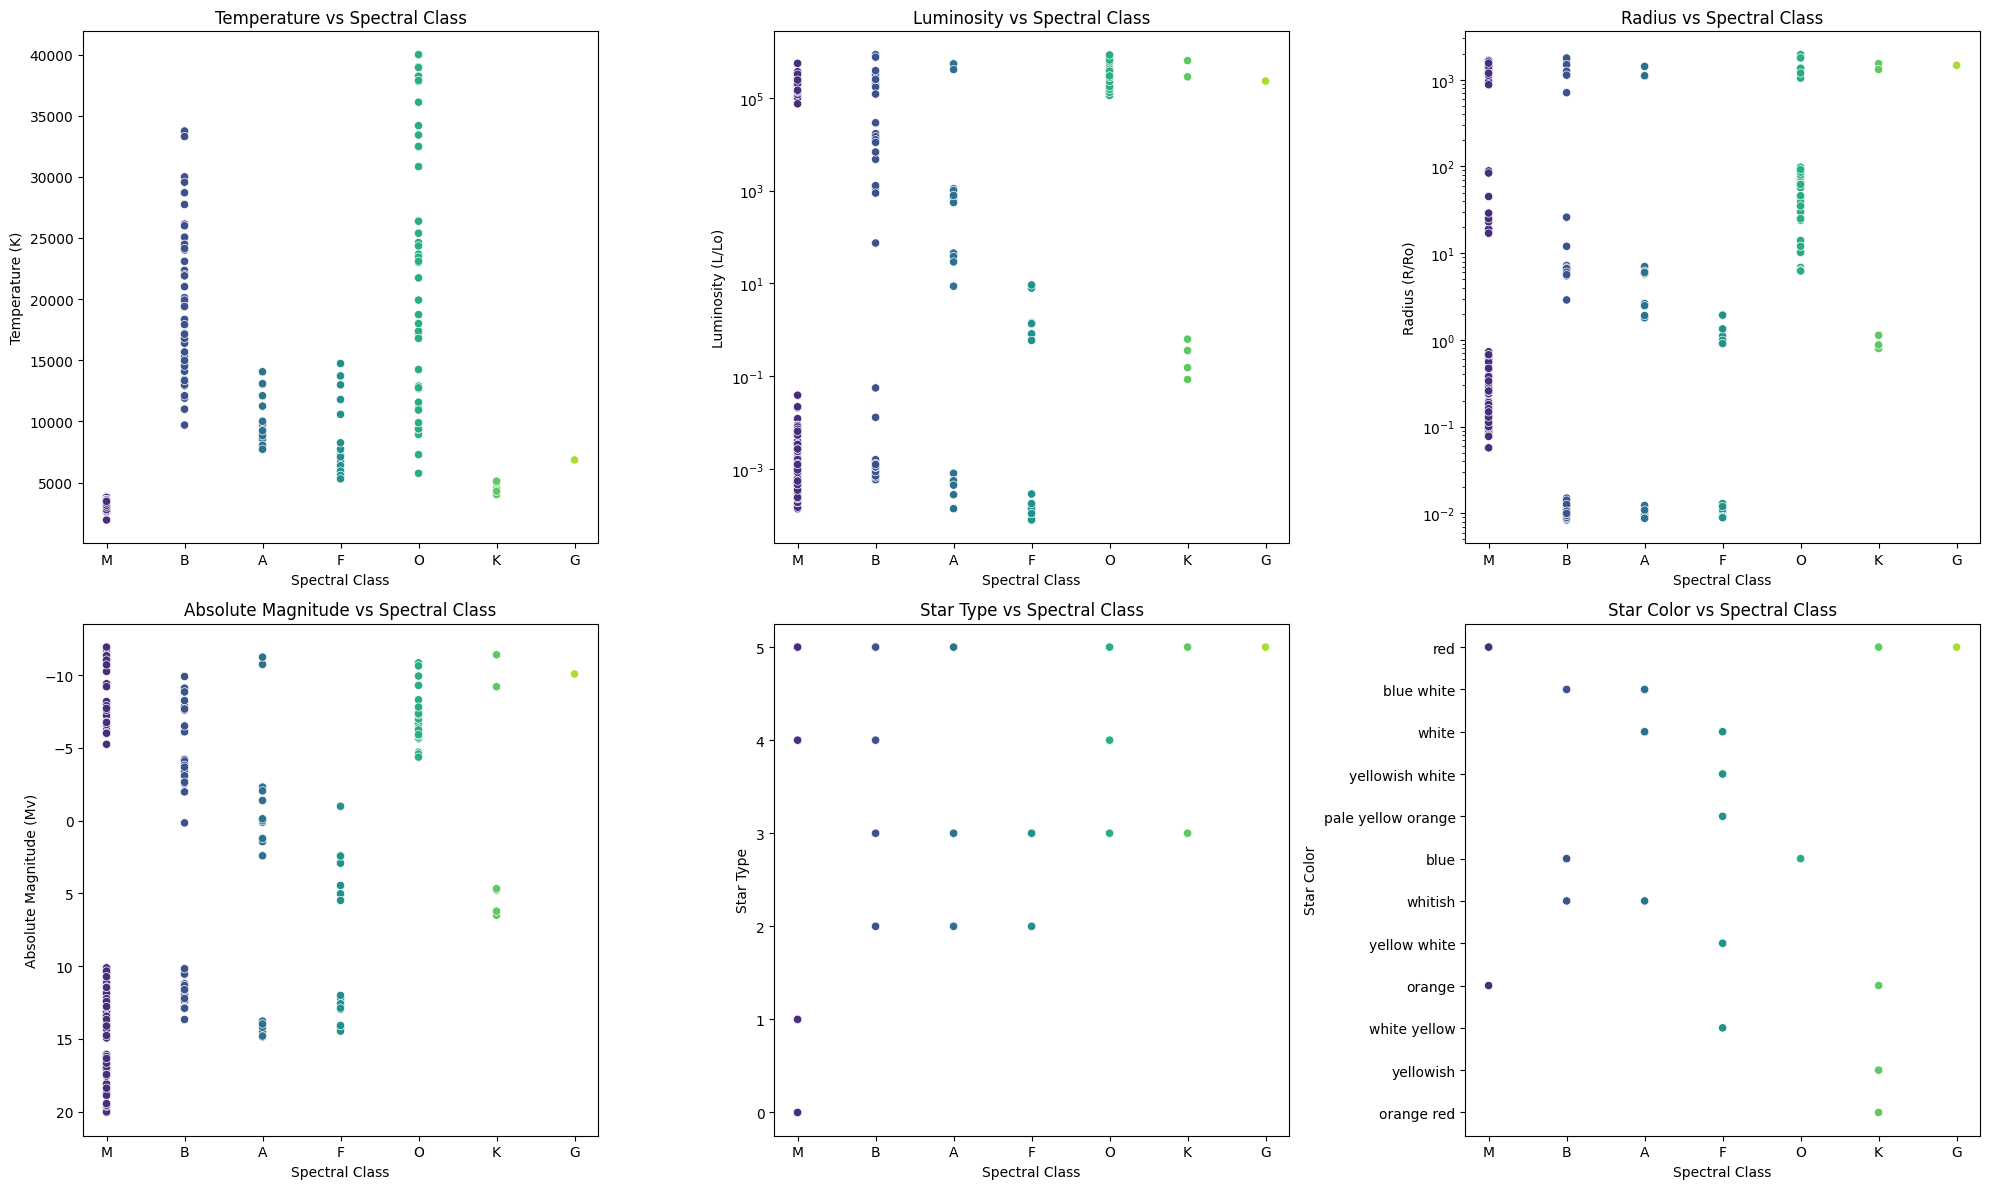

In [104]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Scatter plot Temperature vs Spectral Class
sns.scatterplot(data=df, x='Spectral Class', y='Temperature (K)', hue='Spectral Class', palette='viridis', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Temperature vs Spectral Class')
axes[0, 0].set_xlabel('Spectral Class')
axes[0, 0].set_ylabel('Temperature (K)')

# Scatter plot Luminosity vs Spectral Class
sns.scatterplot(data=df, x='Spectral Class', y='Luminosity(L/Lo)', hue='Spectral Class', palette='viridis', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Luminosity vs Spectral Class')
axes[0, 1].set_xlabel('Spectral Class')
axes[0, 1].set_ylabel('Luminosity (L/Lo)')
axes[0, 1].set_yscale('log')

# Scatter plot Radius vs Spectral Class
sns.scatterplot(data=df, x='Spectral Class', y='Radius(R/Ro)', hue='Spectral Class', palette='viridis', ax=axes[0, 2], legend=False)
axes[0, 2].set_title('Radius vs Spectral Class')
axes[0, 2].set_xlabel('Spectral Class')
axes[0, 2].set_ylabel('Radius (R/Ro)')
axes[0, 2].set_yscale('log')

# Scatter plot Absolute Magnitude vs Spectral Class
sns.scatterplot(data=df, x='Spectral Class', y='Absolute magnitude(Mv)', hue='Spectral Class', palette='viridis', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Absolute Magnitude vs Spectral Class')
axes[1, 0].set_xlabel('Spectral Class')
axes[1, 0].set_ylabel('Absolute Magnitude (Mv)')
axes[1, 0].invert_yaxis()

# Scatter plot Star Type vs Spectral Class
sns.scatterplot(data=df, x='Spectral Class', y='Star type', hue='Spectral Class', palette='viridis', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Star Type vs Spectral Class')
axes[1, 1].set_xlabel('Spectral Class')
axes[1, 1].set_ylabel('Star Type')

# Scatter plot Star Color vs Spectral Class
sns.scatterplot(data=df, x='Spectral Class', y='Star color', hue='Spectral Class', palette='viridis', ax=axes[1, 2], legend=False)
axes[1, 2].set_title('Star Color vs Spectral Class')
axes[1, 2].set_xlabel('Spectral Class')
axes[1, 2].set_ylabel('Star Color')

# Adjust layout
plt.tight_layout()
plt.show()

The plots follow what we commonly understand from stars, and can be interperted as such:

1. Temperature vs Spectral Class
 * Observation: Temperature decreases from Spectral Class O to M.
 * Insight: Spectral Class O stars are the hottest, while M stars are the coolest.
2. Top Middle: Luminosity vs Spectral Class
 * Observation: Luminosity is highest for Spectral Class O and decreases towards M.
 * Insight: There is a wide range of luminosities within each spectral class, but O stars are generally the most luminous.
3. Top Right: Radius vs Spectral Class
 * Observation: Radius shows a large spread across spectral classes, with some O stars having very large radii.
 * Insight: Larger stars are typically found in the earlier spectral classes (O, B).
4. Bottom Left: Absolute Magnitude vs Spectral Class
  * Observation: Absolute magnitude decreases (becomes more negative, hence brighter) from M to O.
 * Insight: O and B stars tend to be much brighter compared to M stars.
5. Bottom Middle: Star Type vs Spectral Class
 * Observation: Different star types are distributed across spectral classes, with a notable number of main sequence stars in various classes.
 * Insight: Spectral class alone doesn't determine star type; it can span across various types including main sequence, giants, etc.
6. Bottom Right: Star Color vs Spectral Class
 * Observation: Star color changes progressively from red to blue across spectral classes M to O.
 * Insight: This aligns with the temperature observation, where hotter stars (O) appear blue, and cooler stars (M) appear red.

# **3. Data Preprocessing**


---



## **3.1. Encoding Spectral class for numerical representation**

In [105]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode Spectral Class
df['Spectral Class'] = label_encoder.fit_transform(df['Spectral Class'])

## **3.2. One hot encoding  star color for numerical representation**

In [106]:
df = pd.get_dummies(df, columns=['Star color'])

## **3.3. Separating the features and the target variable for model training**

In [107]:
X = df.drop(['Spectral Class'], axis=1)
y = df['Spectral Class']

## **3.4. Splitting the train and test data 80:20**

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
from collections import Counter

Counter(y_train)

Counter({5: 90, 1: 36, 6: 30, 2: 15, 0: 17, 3: 1, 4: 3})

In [110]:
# smote = SMOTE(random_state=42, k_neighbors=1)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## **3.5. Scaling the data**

In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
X_train_scaled

array([[-0.72395404, -0.5812899 , -0.43358008, ..., -0.19451951,
        -0.10259784, -0.10259784],
       [-0.74538194, -0.58128987, -0.43398364, ..., -0.19451951,
        -0.10259784, -0.10259784],
       [ 0.86160377, -0.5812899 , -0.43407409, ..., -0.19451951,
        -0.10259784, -0.10259784],
       ...,
       [-0.66652725, -0.5812894 , -0.43248702, ..., -0.19451951,
         9.74679434, -0.10259784],
       [ 1.52051184,  0.89684591,  1.86659967, ..., -0.19451951,
        -0.10259784, -0.10259784],
       [ 1.36087395,  0.17416604, -0.36109336, ..., -0.19451951,
        -0.10259784, -0.10259784]])

# **4. Supervised model: Logistic Rgeression**


---



## **4.1. Training the model with the optimal C=10**

In [113]:
# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, C= 10)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lr = log_reg.predict(X_test_scaled)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred_lr)

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           4       1.00      0.33      0.50         3
           5       0.91      1.00      0.95        21
           6       1.00      1.00      1.00        10

    accuracy                           0.96        48
   macro avg       0.99      0.89      0.91        48
weighted avg       0.96      0.96      0.95        48

Confusion Matrix:


array([[ 2,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 21,  0],
       [ 0,  0,  0,  0,  0, 10]])

# **5. Unsupervised model: KMeans**


---



In [114]:
# KMeans Clustering
kmeans_model = KMeans(n_clusters=7, random_state=42, n_init=500)
kmeans_model.fit(X_train_scaled)

# Predict and evaluate
y_pred_kmeans = kmeans_model.predict(X_test_scaled)

# Map cluster labels to actual labels using majority voting within clusters
def map_clusters_to_labels(cluster_labels, true_labels):
    labels_map = {}
    for cluster in set(cluster_labels):
        mask = (cluster_labels == cluster)
        if len(true_labels[mask]) == 0:
            continue
        most_common_label = mode(true_labels[mask]).mode
        labels_map[cluster] = most_common_label
    return labels_map

labels_map = map_clusters_to_labels(kmeans_model.labels_, y_train)

# Ensure that all clusters have a mapped label
mapped_labels = [labels_map.get(label, -1) for label in y_pred_kmeans]

print("KMeans Clustering Performance:")
print("Silhouette Score:", silhouette_score(X_test_scaled, y_pred_kmeans))
print(classification_report(y_test, mapped_labels, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, mapped_labels))


KMeans Clustering Performance:
Silhouette Score: 0.4399817007772148
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      0.60      0.67        10
           2       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         3
           5       0.84      1.00      0.91        21
           6       0.83      1.00      0.91        10

    accuracy                           0.83        48
   macro avg       0.74      0.68      0.69        48
weighted avg       0.78      0.83      0.80        48

Confusion Matrix:
[[ 1  1  0  0  0  0]
 [ 0  6  0  0  2  2]
 [ 0  0  2  0  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 10]]


# **6. MLP**


---



The codes for this model and CNN are partially taken from my second group assignment and adjusted for this task.

## **6.1. Creating a baseline model**

In [123]:
# Define the baseline MLP model
def baseline_mlp(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the baseline MLP model
input_shape = (17,)
num_classes = len(set(y_train))
baseline_model = baseline_mlp(input_shape, num_classes)

## **6.2. Training the baseline model**

In [129]:
# Train the baseline MLP model
start_baseline = time.time()
baseline_history = baseline_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
end_baseline = time.time()

print("Training time for baseline MLP model:", end_baseline - start_baseline, "s")

test_loss, test_accuracy = baseline_model.evaluate(X_test_scaled, y_test)

Epoch 1/50
5/5 [==============================] - 0s 24ms/step - loss: 0.0962 - accuracy: 0.9477 - val_loss: 0.3282 - val_accuracy: 0.9231
Epoch 2/50
5/5 [==============================] - 0s 16ms/step - loss: 0.1073 - accuracy: 0.9477 - val_loss: 0.3081 - val_accuracy: 0.9487
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0822 - accuracy: 0.9739 - val_loss: 0.3160 - val_accuracy: 0.9487
Epoch 4/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0987 - accuracy: 0.9608 - val_loss: 0.3622 - val_accuracy: 0.8974
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0947 - accuracy: 0.9608 - val_loss: 0.4237 - val_accuracy: 0.8974
Epoch 6/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0918 - accuracy: 0.9542 - val_loss: 0.4198 - val_accuracy: 0.8718
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.0875 - accuracy: 0.9542 - val_loss: 0.3212 - val_accuracy: 0.9231
Epoch 8/50
5/5 [===========

## **6.3. Evaluating baseline model**

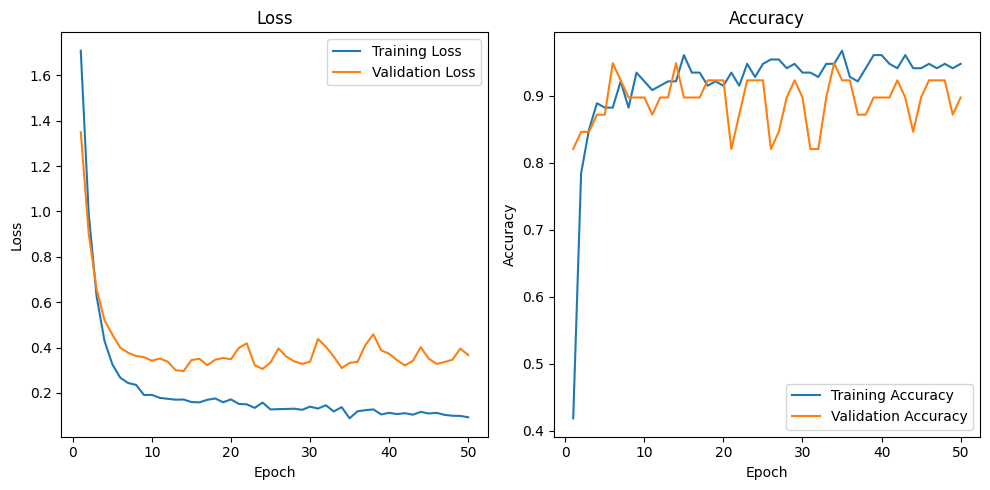

In [125]:
# Get the training loss and accuracy values from the history object
train_loss = baseline_history.history['loss']
train_accuracy = baseline_history.history['accuracy']

# Get the validation loss and accuracy values from the history object
val_loss = baseline_history.history['val_loss']
val_accuracy = baseline_history.history['val_accuracy']

# Create a figure and axis objects
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot training and validation loss
ax[0].plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
ax[0].plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot training and validation accuracy
ax[1].plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
ax[1].plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

## **6.4. Hyperparameter tuning**

In [132]:
class MLPModel:
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    # Define the MLP architecture
    def mlp(self, activation, optimizer, drop):
        model = Sequential()
        model.add(Dense(128, activation=activation, input_shape=self.input_shape))
        model.add(Dropout(drop))
        model.add(Dense(64, activation=activation))
        model.add(Dense(self.num_classes, activation='softmax'))
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    # Build the model with hyperparameters
    def build_model(self, hp):
        hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'elu'])
        hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'adagrad'])
        hp_drop = hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)
        model = self.mlp(activation=hp_activation, optimizer=hp_optimizer, drop=hp_drop)
        return model

# Initialize the MLPModel class with input shape and number of classes
input_shape = (17,)
num_classes = len(set(y_train))
mlp_model = MLPModel(input_shape, num_classes)

# Initialize the Hyperband tuner
tuner = kt.Hyperband(
    mlp_model.build_model,
    objective='val_accuracy',
    max_epochs=50,
    directory='mlp_tuning',
    project_name='mlp_optimization'
)

# Search for the best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# Get the best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = mlp_model.mlp(
    activation=best_hps.get('activation'),
    optimizer=best_hps.get('optimizer'),
    drop=best_hps.get('dropout')
)

Reloading Tuner from mlp_tuning/mlp_optimization/tuner0.json


## **6.5. Training the optimal model**

In [133]:
start_mlp = time.time()
history_mlp = best_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
end_mlp = time.time()

print("Training time for MLP model:", end_mlp - start_mlp, "s")
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)

Epoch 1/50
5/5 [==============================] - 1s 90ms/step - loss: 1.9611 - accuracy: 0.1242 - val_loss: 1.7246 - val_accuracy: 0.4872
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 1.6735 - accuracy: 0.4967 - val_loss: 1.5146 - val_accuracy: 0.7436
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 1.4347 - accuracy: 0.6536 - val_loss: 1.3282 - val_accuracy: 0.8205
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 1.2102 - accuracy: 0.7778 - val_loss: 1.1684 - val_accuracy: 0.7949
Epoch 5/50
5/5 [==============================] - 0s 18ms/step - loss: 1.0027 - accuracy: 0.8039 - val_loss: 1.0295 - val_accuracy: 0.8462
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 0.8952 - accuracy: 0.7843 - val_loss: 0.9099 - val_accuracy: 0.8718
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 0.7286 - accuracy: 0.8301 - val_loss: 0.8074 - val_accuracy: 0.8718
Epoch 8/50
5/5 [===========

## **6.6. Evaluating the final model**

In [136]:
mlp_pred = best_model.predict(X_test_scaled)
mlp_pred_classes = mlp_pred.argmax(axis=1)

print("MLP Performance:")
print(classification_report(y_test, mlp_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, mlp_pred_classes))

2/2 [==============================] - 0s 5ms/step
MLP Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           4       1.00      0.33      0.50         3
           5       0.91      1.00      0.95        21
           6       1.00      1.00      1.00        10

    accuracy                           0.96        48
   macro avg       0.99      0.89      0.91        48
weighted avg       0.96      0.96      0.95        48

Confusion Matrix:
[[ 2  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 10]]


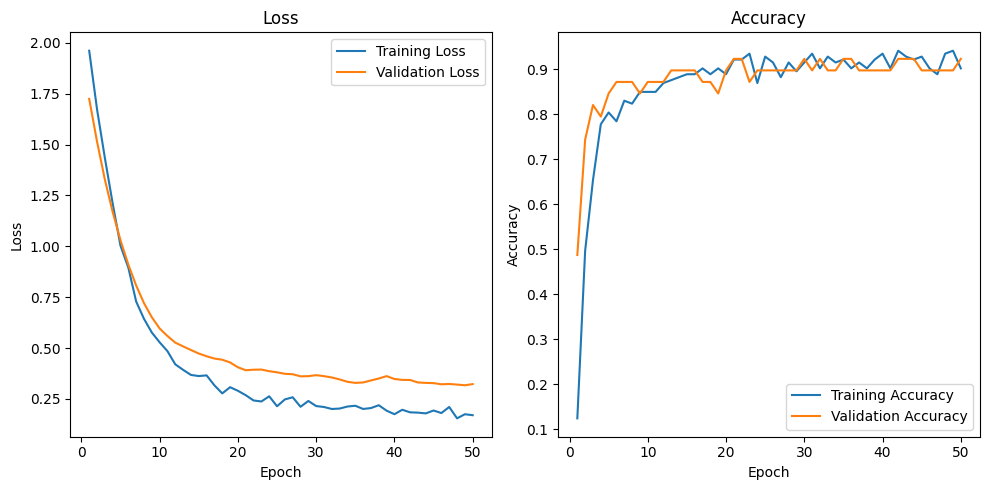

In [135]:
# Get the training loss and accuracy values from the history object
train_loss = history_mlp.history['loss']
train_accuracy = history_mlp.history['accuracy']

# Get the validation loss and accuracy values from the history object
val_loss = history_mlp.history['val_loss']
val_accuracy = history_mlp.history['val_accuracy']

# Create a figure and axis objects
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot training and validation loss
ax[0].plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
ax[0].plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot training and validation accuracy
ax[1].plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
ax[1].plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

# **7. CNN**


---



## **7.1. Reshaping the data for CNN**

In [137]:
# Reshape data for Conv1D
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

print("Shape of X_train_cnn:", X_train_cnn.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train_cnn: (192, 17, 1)
Shape of y_train: (192,)


## **7.2. Creating a baseline model**

The code structure for this part and part 7.3. is partially derived from my second assignment, with adjustments made for the different dataset.

In [138]:
def baseline_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (17, 1)
num_classes = len(set(y_train))
baseline_cnn = baseline_model(input_shape, num_classes)

## **7.3. Training baseline model**

In [139]:
start_cnn_baseline = time.time()
baseline_history = baseline_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)
end_cnn_baseline = time.time()

test_loss, test_accuracy = baseline_cnn.evaluate(X_test_cnn, y_test)

print(f'Test loss (baseline): {test_loss}, Test accuracy (baseline): {test_accuracy}')

Epoch 1/50
5/5 [==============================] - 1s 63ms/step - loss: 1.7968 - accuracy: 0.4118 - val_loss: 1.7097 - val_accuracy: 0.3590
Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 1.5373 - accuracy: 0.4967 - val_loss: 1.5585 - val_accuracy: 0.3590
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 1.3739 - accuracy: 0.4967 - val_loss: 1.4767 - val_accuracy: 0.3590
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 1.2394 - accuracy: 0.4967 - val_loss: 1.3503 - val_accuracy: 0.3590
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 1.1115 - accuracy: 0.5163 - val_loss: 1.2096 - val_accuracy: 0.4872
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 1.0090 - accuracy: 0.6601 - val_loss: 1.1549 - val_accuracy: 0.4872
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.9087 - accuracy: 0.6993 - val_loss: 1.0927 - val_accuracy: 0.6154
Epoch 8/50
5/5 [===========

## **7.4. Evaluating the baseline model**

In [140]:
# Evaluate the baseline model
baseline_pred = baseline_cnn.predict(X_test_cnn)
baseline_pred_classes = baseline_pred.argmax(axis=1)

print("Baseline CNN Performance:")
print(classification_report(y_test, baseline_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, baseline_pred_classes))
print("Training time for baseline CNN model:", end_cnn_baseline - start_cnn_baseline, "s")

2/2 [==============================] - 0s 6ms/step
Baseline CNN Performance:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.91      1.00      0.95        10
           2       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         3
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        10

    accuracy                           0.92        48
   macro avg       0.73      0.75      0.71        48
weighted avg       0.88      0.92      0.89        48

Confusion Matrix:
[[ 1  1  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  2  0  1  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 10]]
Training time for baseline CNN model: 5.909653425216675 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **7.5. Plotting the Loss and Accuracy graph for the baseline model**

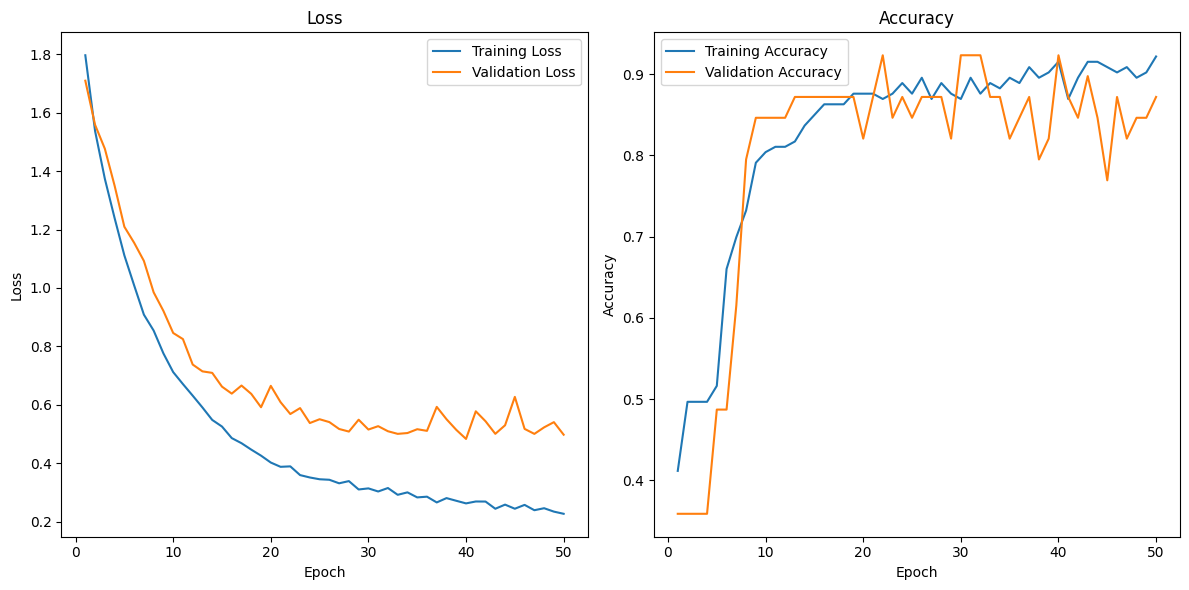

In [141]:
# Get the training loss and accuracy values from the history object
train_loss = baseline_history.history['loss']
train_accuracy = baseline_history.history['accuracy']

# Get the validation loss and accuracy values from the history object
val_loss = baseline_history.history['val_loss']
val_accuracy = baseline_history.history['val_accuracy']

# Create a figure and axis objects
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot training and validation loss
ax[0].plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
ax[0].plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot training and validation accuracy
ax[1].plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
ax[1].plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

## **7.6. Hyperparameter tuning**

In [142]:
# Define the CNN class for model definition and hyperparameter tuning
class CNNModel:
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    # Define the CNN architecture
    def cnn(self, activation, optimizer, drop):
        model = Sequential()
        model.add(Conv1D(32, kernel_size=3, activation=activation, input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(64, activation=activation))
        model.add(Dropout(drop))
        model.add(Dense(self.num_classes, activation='softmax'))
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    # Build the model with hyperparameters
    def build_model(self, hp):
        hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'elu'])
        hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'adagrad'])
        hp_drop = hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)
        model = self.cnn(activation=hp_activation, optimizer=hp_optimizer, drop=hp_drop)
        return model

# Initialize the CNNModel class with input shape and number of classes
input_shape = (17, 1)
num_classes = len(set(y_train))
cnn_model = CNNModel(input_shape, num_classes)

# Initialize the Hyperband tuner
tuner = kt.Hyperband(
    cnn_model.build_model,
    objective='val_accuracy',
    max_epochs=20,
    directory='cnn_tuning',
    project_name='cnn_optimization'
)

# Search for the best hyperparameters
tuner.search(X_train_cnn, y_train, epochs=50, validation_split=0.2)

# Get the best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = cnn_model.cnn(
    activation=best_hps.get('activation'),
    optimizer=best_hps.get('optimizer'),
    drop=best_hps.get('dropout')
)

Reloading Tuner from cnn_tuning/cnn_optimization/tuner0.json


## **7.7. Building model with optimal parameters**

In [143]:
# Train the best model
start_cnn = time.time()
history_cnn = best_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)
end_cnn = time.time()

print("Training time for CNN model:", end_cnn - start_cnn, "s")

Epoch 1/50
5/5 [==============================] - 1s 56ms/step - loss: 1.5507 - accuracy: 0.5621 - val_loss: 1.2176 - val_accuracy: 0.7949
Epoch 2/50
5/5 [==============================] - 0s 11ms/step - loss: 1.0496 - accuracy: 0.7843 - val_loss: 0.9875 - val_accuracy: 0.8462
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.8268 - accuracy: 0.8105 - val_loss: 0.8312 - val_accuracy: 0.8462
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 0.7384 - accuracy: 0.8235 - val_loss: 0.7444 - val_accuracy: 0.8462
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6093 - accuracy: 0.8366 - val_loss: 0.6761 - val_accuracy: 0.8462
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.5632 - accuracy: 0.8301 - val_loss: 0.6697 - val_accuracy: 0.8462
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5265 - accuracy: 0.8170 - val_loss: 0.6134 - val_accuracy: 0.8718
Epoch 8/50
5/5 [===========

## **7.8. Evaluating the optimal model**

In [144]:
# Evaluate the best model
cnn_pred = best_model.predict(X_test_cnn)
cnn_pred_classes = cnn_pred.argmax(axis=1)

print("CNN Performance:")
print(classification_report(y_test, cnn_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, cnn_pred_classes))

2/2 [==============================] - 0s 6ms/step
CNN Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        10
           2       0.67      1.00      0.80         2
           4       1.00      0.33      0.50         3
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        10

    accuracy                           0.96        48
   macro avg       0.94      0.89      0.88        48
weighted avg       0.97      0.96      0.95        48

Confusion Matrix:
[[ 2  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  1  1  1  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 10]]


## **7.9. Plotting the accuracy and loss**

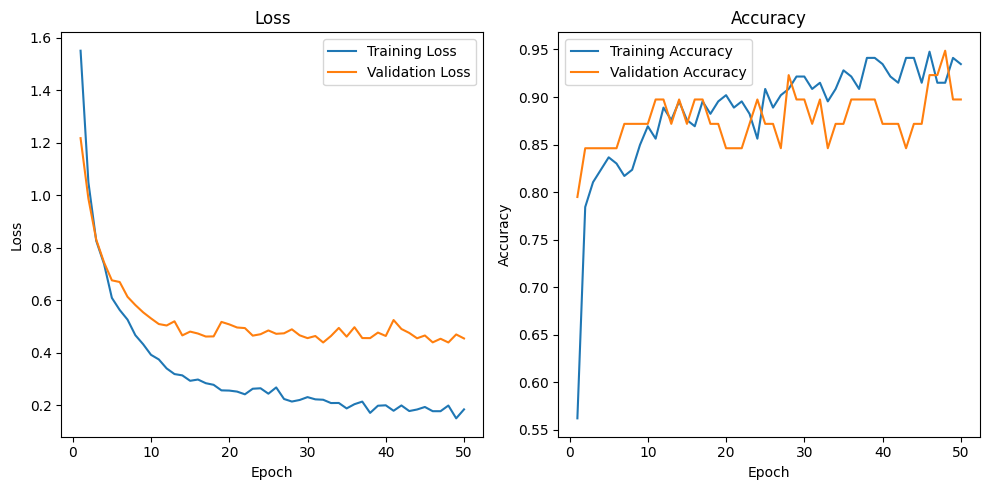

In [145]:
# Get the training loss and accuracy values from the history object
train_loss = history_cnn.history['loss']
train_accuracy = history_cnn.history['accuracy']

# Get the validation loss and accuracy values from the history object
val_loss = history_cnn.history['val_loss']
val_accuracy = history_cnn.history['val_accuracy']

# Create a figure and axis objects
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot training and validation loss
ax[0].plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
ax[0].plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot training and validation accuracy
ax[1].plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
ax[1].plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

# **8. Comparison**


---



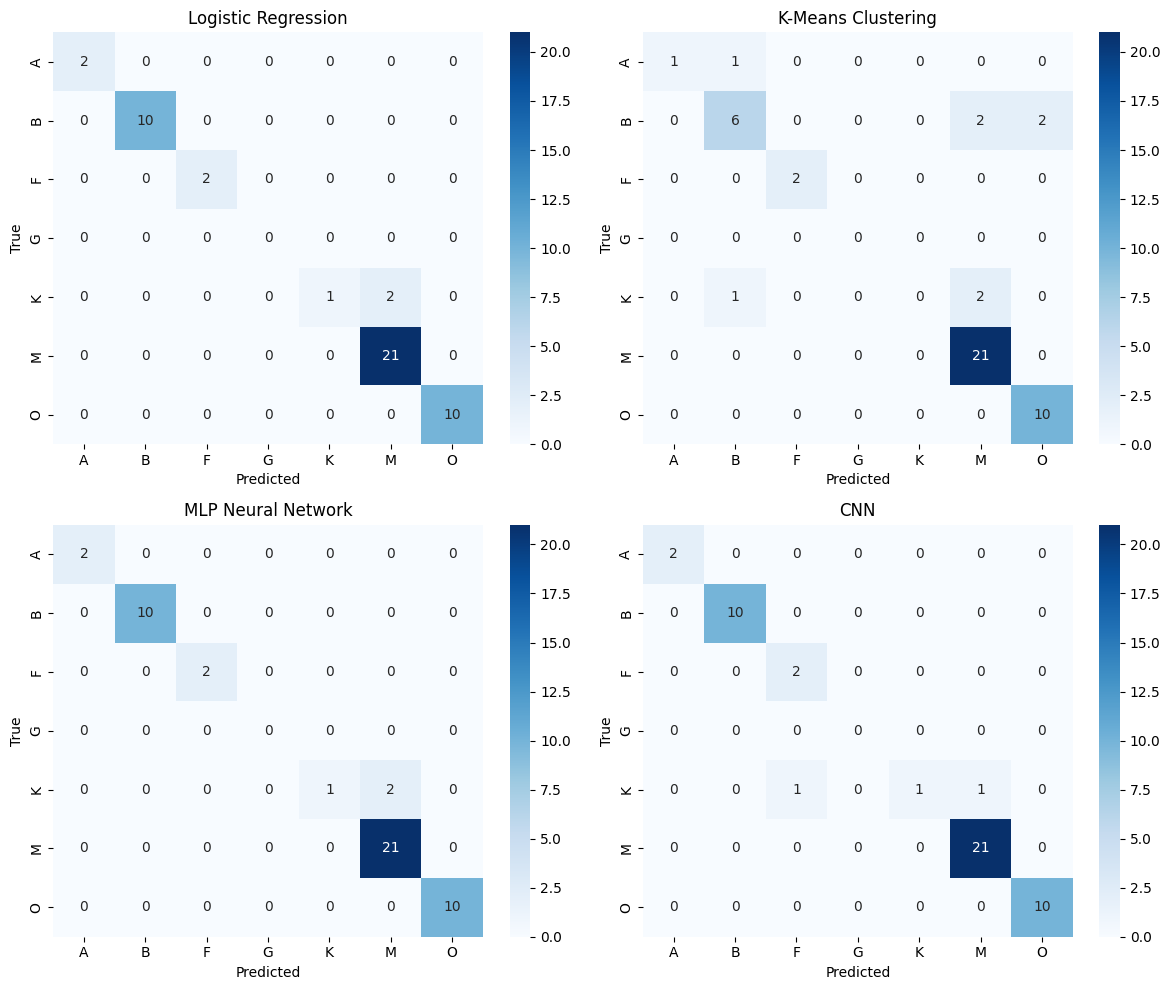

In [146]:
# Inverse transform the encoded labels to get the original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_lr_original = label_encoder.inverse_transform(y_pred_lr)
mapped_labels_original = label_encoder.inverse_transform(mapped_labels)
mlp_pred_classes_original = label_encoder.inverse_transform(mlp_pred_classes)
cnn_pred_classes_original = label_encoder.inverse_transform(cnn_pred_classes)

# Function to plot a confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Get the original class labels
class_labels = label_encoder.classes_

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot each confusion matrix in its respective subplot
plot_confusion_matrix(axs[0, 0], y_test_original, y_pred_lr_original, "Logistic Regression", class_labels)
plot_confusion_matrix(axs[0, 1], y_test_original, mapped_labels_original, "K-Means Clustering", class_labels)
plot_confusion_matrix(axs[1, 0], y_test_original, mlp_pred_classes_original, "MLP Neural Network", class_labels)
plot_confusion_matrix(axs[1, 1], y_test_original, cnn_pred_classes_original, "CNN", class_labels)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()